In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
data.shape

(13320, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
len(data['society'].unique())

2689

In [11]:
for col in data.columns:
    print(data[col].value_counts())
    print('*' *20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [12]:
data.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)

In [13]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [17]:
data['location'].mode()

0    Whitefield
dtype: object

In [18]:
data[data['location'].isna()]

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,3.0,86.0


In [19]:
data['location'] = data['location'].fillna('Whitefield')

In [20]:
data.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [21]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [22]:
data['size'] = data['size'].fillna('2 BHK')
data['bath'] = data['bath'].fillna(data['bath'].median())

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [24]:
data['size'].str.split().str.get(0).astype(int)

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: int32

In [25]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [26]:
data[data['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [27]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
def convert_range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
convert_range('1133 - 1384')

1258.5

In [30]:
data['total_sqft'] = data['total_sqft'].apply(convert_range)

In [31]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [32]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [34]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [35]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [36]:
data['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [37]:
data['location'][0].strip()

'Electronic City Phase II'

In [38]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [39]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [40]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
data['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [41]:
data['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [42]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [43]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [44]:
import seaborn as sns

C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

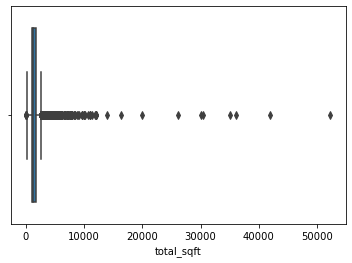

In [45]:
sns.boxplot(data['total_sqft'])

C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


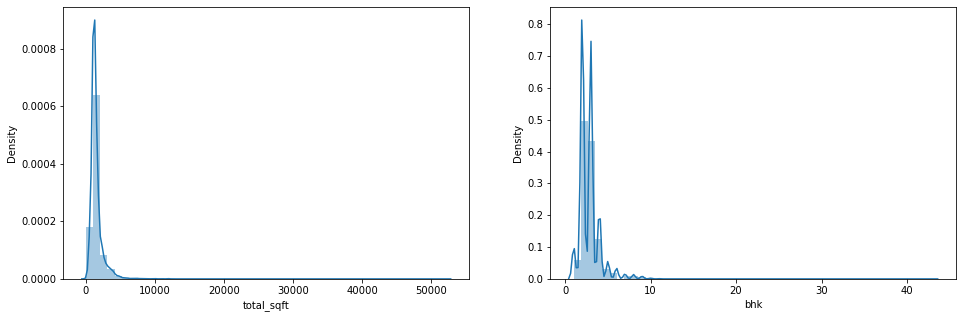

In [46]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['total_sqft'])

plt.subplot(1,2,2)
sns.distplot(data['bhk'])

plt.show()

In [47]:
print("Highest allowed",data['total_sqft'].mean() + 3*data['total_sqft'].std())
print("Lowest allowed",data['total_sqft'].mean() - data['total_sqft'].std())

Highest allowed 5274.842468384578
Lowest allowed 321.2214357556902


In [48]:
len(data[data['total_sqft'] > 5274.842468384578])

118

In [49]:
len(data[data['total_sqft'] < 321.2214357556902])

14

In [50]:
data['total_sqft'].shape

(13320,)

In [51]:
data_1 = data[(data['total_sqft'] < 5274.842468384578) & (data['total_sqft'] > 321.2214357556902)]
data_1.shape

(13142, 7)

C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


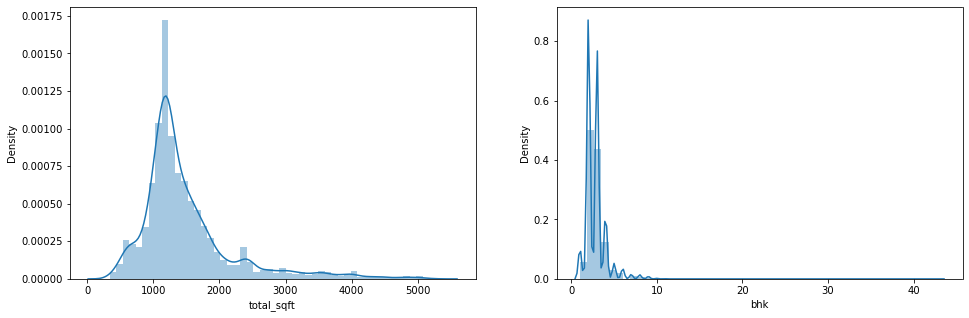

In [52]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data_1['total_sqft'])

plt.subplot(1,2,2)
sns.distplot(data_1['bhk'])

plt.show()

C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

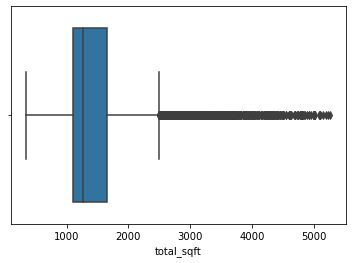

In [53]:
sns.boxplot(data_1['total_sqft'])

In [54]:
data_1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13142.000000,13142.000000,13142.000000,13142.000000,13142.000000
mean,1491.897040,2.663141,105.547056,2.781921,6644.796233
std,720.097045,1.283370,109.133718,1.248299,4465.562693
min,340.000000,1.000000,8.440000,1.000000,500.000000
25%,1100.000000,2.000000,50.000000,2.000000,4262.948207
50%,1270.000000,2.000000,70.960000,3.000000,5416.666667
75%,1660.000000,3.000000,120.000000,3.000000,7264.889774
max,5270.000000,40.000000,2600.000000,43.000000,176470.588235


In [55]:
data_1['price_per_sqft'].describe()

count     13142.000000
mean       6644.796233
std        4465.562693
min         500.000000
25%        4262.948207
50%        5416.666667
75%        7264.889774
max      176470.588235
Name: price_per_sqft, dtype: float64

In [56]:
for key, subdf in data.groupby('location'):
    m = np.mean(data['price_per_sqft'])
    st = np.std(data['price_per_sqft'])
    gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
gen_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [57]:
def remove_outlier_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output, gen_df], ignore_index = True)
    return df_output
data_1 = remove_outlier_sqft(data_1)
data_1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10914.000000,10914.000000,10914.000000,10914.000000,10914.000000
mean,1461.160602,2.523456,90.013908,2.642019,5842.173624
std,663.778734,1.058644,72.839383,1.009184,2510.119565
min,340.000000,1.000000,10.000000,1.000000,1900.000000
25%,1100.000000,2.000000,49.005000,2.000000,4264.146014
50%,1270.000000,2.000000,68.000000,2.000000,5240.483937
75%,1636.000000,3.000000,100.000000,3.000000,6621.692960
max,5270.000000,15.000000,1250.000000,14.000000,26973.684211


In [58]:
data_1.shape

(10914, 7)

C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ajmer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


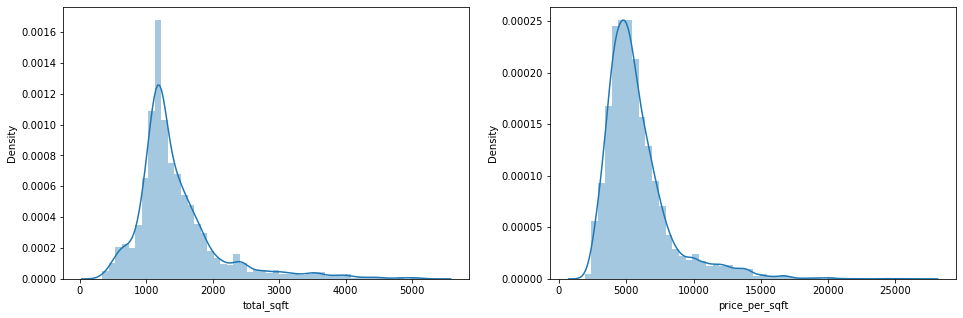

In [59]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data_1['total_sqft'])

plt.subplot(1,2,2)
sns.distplot(data_1['price_per_sqft'])

plt.show()

In [60]:
data_1['bhk'].value_counts()

2     4921
3     4190
4      856
1      542
5      188
6      112
8       40
7       37
9       21
10       3
11       3
14       1
Name: bhk, dtype: int64

In [61]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
        return df.drop(exclude_indices, axis='index')

In [62]:
data_2 = bhk_outlier_remover(data_1)

In [63]:
data_2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.00,7,9139.784946
...,...,...,...,...,...,...,...
10909,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10910,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10911,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10912,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [64]:
data_2.shape

(10914, 7)

In [65]:
data_2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10914.000000,10914.000000,10914.000000,10914.000000,10914.000000
mean,1461.160602,2.523456,90.013908,2.642019,5842.173624
std,663.778734,1.058644,72.839383,1.009184,2510.119565
min,340.000000,1.000000,10.000000,1.000000,1900.000000
25%,1100.000000,2.000000,49.005000,2.000000,4264.146014
50%,1270.000000,2.000000,68.000000,2.000000,5240.483937
75%,1636.000000,3.000000,100.000000,3.000000,6621.692960
max,5270.000000,15.000000,1250.000000,14.000000,26973.684211


In [66]:
data_2.drop(columns=['size', 'price_per_sqft'], inplace=True)

In [67]:
data_2.to_csv('Bengluru Houses Data Cleaned.csv')

In [68]:
X = data_2.drop(columns=['price'])
y = data_2['price']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape, X_test.shape

((8731, 4), (2183, 4))

In [72]:
y_train.shape, y_test.shape

((8731,), (2183,))

In [73]:
col_transform = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder='passthrough')

In [74]:
scaler = StandardScaler()

In [75]:
lr = LinearRegression(normalize=True)

In [76]:
pipe = make_pipeline(col_transform, scaler, lr)

In [77]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [78]:
y_pred_lr = pipe.predict(X_test)

In [79]:
r2_score(y_test, y_pred_lr)

0.7807268698446586

In [80]:
lasso = Lasso()

In [81]:
pipe = make_pipeline(col_transform, scaler, lasso)

In [82]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [83]:
y_pred_lasso = pipe.predict(X_test)

In [84]:
r2_score(y_test, y_pred_lasso)

0.7585946964576564

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

In [86]:
xg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1)

In [87]:
pipe = make_pipeline(col_transform, scaler, xg)

In [88]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(n_estimators=500))])

In [94]:
inputs = pd.DataFrame([['1st Block Jayanagar', 1000, 1, 2]], columns=['location', 'total_sqft', 'bath', 'bhk'])
inputs

,location,total_sqft,bath,bhk
0,1st Block Jayanagar,1000,1,2


In [97]:
pipe.predict(inputs)[0]

103.30966631965592

In [89]:
y_pred_xg = pipe.predict(X_test)

In [92]:
y_pred_x

IndexError: invalid index to scalar variable.

In [165]:
r2_score(y_test, y_pred_xg)

0.8103389438131846

In [166]:
import pickle

In [167]:
pickle.dump(pipe, open('XgboostModel.pkl', 'wb'))

In [3]:
data = pd.read_csv('Bengluru Houses Data Cleaned.csv', l=)
data

,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,2,1st Block Jayanagar,1200.0,6.0,125.00,6
3,3,1st Block Jayanagar,1875.0,2.0,235.00,3
4,4,1st Block Jayanagar,930.0,4.0,85.00,7
...,...,...,...,...,...,...
10909,10909,other,1353.0,2.0,110.00,2
10910,10910,other,812.0,1.0,26.00,1
10911,10911,other,1440.0,2.0,63.93,3
10912,10912,other,1075.0,2.0,48.00,2


    <script>
        function form_handler(event){
            event.preventDefault();
        }
        function send_data()
        {
            document.querySelector('form').addEventListener('submit', form_handler);
            
        }
    </script>